In [1]:
import numpy as np
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import img_to_array
import cv2
import visuals as vs


Using TensorFlow backend.


# Dataset train Load

In [2]:
dataX = []
dataY = []
label = []

imageDim = (64,64,1)
  
pathX = "dataset_raw_extended/asd/cross/X/*"
pathY = "dataset_raw_extended/asd/cross/Y/*"
asd_subjects = len(np.array(glob(pathX)))
print("asd subjects", asd_subjects)
subjects_class = "asd"

imagePathsX = np.array(glob(pathX))
for path in imagePathsX:
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataX.append(image)
    if (subjects_class == "asd"):
        label.append([1,0])
    else:
        label.append([0,1])
    
imagePathsY = np.array(glob(pathY))
for path in imagePathsX:
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataY.append(image)

pathX = "dataset_raw_extended/td/cross/X/*"
pathY = "dataset_raw_extended/td/cross/Y/*"
print("td subjects", len(np.array(glob(pathX))))
subjects_class = "td"
imagePathsX = np.array(glob(pathX))
#for path in imagePathsX:
for i in range(0,asd_subjects):    
    path = imagePathsX[i]
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataX.append(image)
    if (subjects_class == "asd"):
        label.append([1,0])
    else:
        label.append([0,1])

imagePathsY = np.array(glob(pathY))
#for path in imagePathsX:
for i in range(0,asd_subjects):    
    path = imagePathsY[i]    
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataY.append(image)

dataX = np.array(dataX)
dataY = np.array(dataY)
label = np.array(label)
#reescalado de imagenes
dataX = dataX.astype('float32')/255
dataY = dataY.astype('float32')/255
print("subjects: ",len(dataX))
#Shuffle both data and label
indices = np.arange(dataX.shape[0])
np.random.shuffle(indices)
dataX = dataX[indices]
dataY = dataY[indices]
label = label[indices]



x_trainX = dataX
x_trainY = dataY
y_train = label

cut = int(x_trainX.shape[0]*0.15)
(x_trainX, x_validX) = x_trainX[cut:], x_trainX[:cut]
(x_trainY, x_validY) = x_trainY[cut:], x_trainY[:cut]
(y_train, y_valid) = y_train[cut:], y_train[:cut]


asd subjects 35
td subjects 177
sujetos:  70


# dataset test load

In [3]:
dataX_test = []
dataY_test = []
label_test = []

imagePaths = np.array(glob("dataset_raw_extended_test/asd/cross/X/*"))
for path in imagePaths:
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataX_test.append(image)
    label_test.append([1,0])

imagePaths = np.array(glob("dataset_raw_extended_test/asd/cross/Y/*"))
for path in imagePaths:
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataY_test.append(image)

        
imagePaths = np.array(glob("dataset_raw_extended_test/td/cross/X/*"))
print(len(imagePaths))
n_tds = 42
#for path in imagePaths:
for i in range(0,n_tds):
    path = imagePaths[i]    
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataX_test.append(image)
    label_test.append([0,1])

imagePaths = np.array(glob("dataset_raw_extended_test/td/cross/Y/*"))
#for path in imagePaths:
for i in range(0,n_tds):
    path = imagePaths[i]
    image = cv2.imread(path)
    image = cv2.resize(image,(imageDim[0],imageDim[1]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = img_to_array(image)
    dataY_test.append(image)
                      
""""""
print("sujetos: ",len(dataX_test))

dataX_test = np.array(dataX_test)
dataY_test = np.array(dataY_test)
label_test = np.array(label_test)


#reescalado de imagenes
dataX_test = dataX_test.astype('float32')/255
dataY_test = dataY_test.astype('float32')/255
"""
x_train = data[cut:]
x_test = data[:cut]
y_train = label[cut:]
y_test = label[:cut]
"""
x_testX = dataX_test
x_testY = dataY_test
y_test = label_test

43
sujetos:  50


# Benchmark 

There are not benchmarks for this problems, we will use a 1 layer cnn as it:

* 1 conv2d 16 kernels 3x3
* 1 maxpool
* 1 flatten
* 1 dense 2560
* 1 softmax

In [250]:
def create_1conv_layer( input_img):
    mod = (Conv2D(filters = 16, kernel_size= 3, padding ='same', activation ='relu', kernel_initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None), input_shape=(imageDim[0],imageDim[1],1)))(input_img)
    mod = (MaxPooling2D(pool_size = 2))(mod)
    mod = Dropout(0.1)(mod)    
      
    return mod
    

In [252]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,Concatenate, Activation, Input, Flatten,concatenate
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.initializers import RandomNormal

inputShape = (imageDim[0],imageDim[1],1)

inputX = Input(shape = inputShape)
inputX_model = create_1conv_layer(inputX)

inputY = Input(shape = (imageDim[0],imageDim[1],1))
inputY_model = create_1conv_layer(inputY)

comb = concatenate([inputX_model,inputY_model])
flat = Flatten()(comb)
dense = Dense(256,activation = 'relu')(flat)
dense = Dropout(0.1)(dense)
output =Dense(2,activation = "softmax")(dense)

benchmark_model = Model(inputs = [inputX, inputY], outputs = [output])
benchmark_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_58 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_59 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 64, 64, 16)   160         input_58[0][0]                   
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 64, 64, 16)   160         input_59[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [262]:
import keras_metrics
benchmark_model.compile (optimizer = 'SGD', loss ='categorical_crossentropy', metrics =[ keras_metrics.recall(label = 0)])

# Training the benchmark

In [204]:
benchmark_model.load_weights('saved_models/weights.best.from_scratch_dual_input_benchmark_model.hdf5')

In [263]:
from keras.callbacks import ModelCheckpoint  

epochs = 25

train_tensors = [x_trainX, x_trainY]
train_targets = y_train
valid_tensors = [x_validX, x_validY]
valid_targets = y_valid

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_dual_input_benchmark_model.hdf5', 
                               verbose=1, save_best_only=True)

history = benchmark_model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=5, callbacks=[checkpointer], verbose=1)

Train on 60 samples, validate on 10 samples
Epoch 1/25
60/60 [==============================] - 3s 43ms/step - loss: 0.0626 - recall: 1.0000 - val_loss: 0.4622 - val_recall: 1.0000

Epoch 00001: val_loss improved from inf to 0.46220, saving model to saved_models/weights.best.from_scratch_dual_input_benchmark_model.hdf5
Epoch 2/25
60/60 [==============================] - 1s 20ms/step - loss: 0.0509 - recall: 1.0000 - val_loss: 0.4112 - val_recall: 1.0000

Epoch 00002: val_loss improved from 0.46220 to 0.41118, saving model to saved_models/weights.best.from_scratch_dual_input_benchmark_model.hdf5
Epoch 3/25
60/60 [==============================] - 1s 19ms/step - loss: 0.0521 - recall: 1.0000 - val_loss: 0.4178 - val_recall: 1.0000

Epoch 00003: val_loss did not improve from 0.41118
Epoch 4/25
60/60 [==============================] - 1s 20ms/step - loss: 0.0930 - recall: 1.0000 - val_loss: 0.4206 - val_recall: 1.0000

Epoch 00004: val_loss did not improve from 0.41118
Epoch 5/25
60/60 [==

In [215]:
def show_benchmark_loss_evolution():
    _, train_acc = benchmark_model.evaluate(train_tensors, train_targets, verbose=0)
    _, test_acc = benchmark_model.evaluate(test_tensors, test_targets, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

Train: 1.000, Test: 0.875


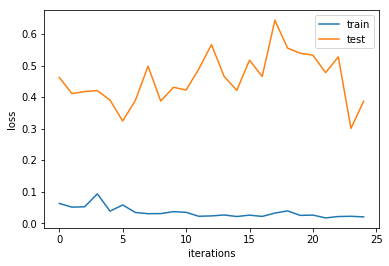

In [264]:
show_benchmark_loss_evolution()

# The Final cnn

Constructed using keras funcional API

* 2 inputs, with 3 convolutional layers each one( conv2d + relu + maxpool)
* Concatenate both cnn´s
* 1 dense relu 256
* 1 dense softmax 2



In [7]:
def create_conv_layers( input_img):
    mod = (Conv2D(filters = 16, kernel_size= 3, padding ='same', activation ='relu', kernel_initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None), input_shape=(imageDim[0],imageDim[1],1)))(input_img)
    mod = (MaxPooling2D(pool_size = 2))(mod)
    mod = Dropout(0.5)(mod)
    
    mod = (Conv2D(filters = 32, kernel_size= 3, padding ='same', activation ='relu',kernel_initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None), input_shape=(imageDim[0],imageDim[1],1)))(mod)
    mod = (MaxPooling2D(pool_size = 2))(mod)
    mod = Dropout(0.5)(mod)
    
    mod = (Conv2D(filters = 64, kernel_size= 3, padding ='same', activation ='relu',kernel_initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None), input_shape=(imageDim[0],imageDim[1],1)))(mod)
    mod = (MaxPooling2D(pool_size = 2))(mod)
    mod = Dropout(0.5)(mod)
    
    return mod
    

"""
modelX = Sequential()
modelX.add(Conv2D(filters = 16, kernel_size= 3, padding ='same',kernel_initializer = k.initializers.glorot_normal(seed=None), activation ='relu', input_shape=(256,256,1)))
modelX.add(MaxPooling2D(pool_size = 2))
modelX.add(Dropout (0.3))
modelX.add(Conv2D(filters = 32, kernel_size = 3,padding = 'same',kernel_initializer = k.initializers.glorot_normal(seed=None), activation = 'relu'))
modelX.add(MaxPooling2D(pool_size = 2))
modelX.add(Dropout (0.3))

modelY = Sequential()
modelY.add(Conv2D(filters = 16, kernel_size= 3, padding ='same',kernel_initializer = k.initializers.glorot_normal(seed=None), activation ='relu', input_shape=(256,256,1)))
modelY.add(MaxPooling2D(pool_size = 2))
modelY.add(Dropout (0.3))
modelY.add(Conv2D(filters = 32, kernel_size = 3,padding = 'same',kernel_initializer = k.initializers.glorot_normal(seed=None), activation = 'relu'))
modelY.add(MaxPooling2D(pool_size = 2))
modelY.add(Dropout (0.3))

model = Sequential()
model = Concatenate()([modelX, modelY])

#model.add(Flatten())
model = (Dense(256, activation = 'relu',kernel_initializer = k.initializers.glorot_normal(seed=None)))
model = (Dropout(0.3))
model = (Dense(2, activation = 'softmax'))
"""

In [46]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,Concatenate, Activation, Input, Flatten,concatenate
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.initializers import RandomNormal

inputShape = (imageDim[0],imageDim[1],1)

inputX = Input(shape = inputShape)
inputX_model = create_conv_layers(inputX)

inputY = Input(shape = (imageDim[0],imageDim[1],1))
inputY_model = create_conv_layers(inputY)

comb = concatenate([inputX_model,inputY_model])
flat = Flatten()(comb)
dense = Dense(256,activation = 'relu')(flat)
dense = Dropout(0.5)(dense)
output =Dense(2,activation = "softmax")(dense)

model = Model(inputs = [inputX, inputY], outputs = [output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 16)   160         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 64, 64, 16)   160         input_11[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [47]:
import keras_metrics
model.compile (optimizer = 'Adam', loss ='categorical_crossentropy', metrics =[ keras_metrics.recall(label = 0)])

In [44]:
model.load_weights('saved_models/weights.best.from_scratch_dual_input.hdf5')

KeyError: "Unable to open object (object 'max_pooling2d_3' doesn't exist)"

In [29]:
from keras.callbacks import ModelCheckpoint  

epochs = 25

train_tensors = [x_trainX, x_trainY]
train_targets = y_train
valid_tensors = [x_validX, x_validY]
valid_targets = y_valid

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_dual_input.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=5, callbacks=[checkpointer], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60 samples, validate on 10 samples
Epoch 1/25
60/60 [==============================] - 2s 32ms/step - loss: 0.6346 - recall: 0.7742 - val_loss: 0.7265 - val_recall: 1.0000

Epoch 00001: val_loss improved from inf to 0.72649, saving model to saved_models/weights.best.from_scratch_dual_input.hdf5


KeyboardInterrupt: 

In [65]:
def show_loss_evolution():
    _, train_acc = model.evaluate(train_tensors, train_targets, verbose=0)
    _, test_acc = model.evaluate(test_tensors, test_targets, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

Train: 1.000, Test: 0.875


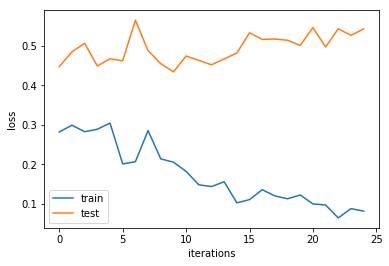

In [64]:
show_loss_evolution()

# Testing the result

In [37]:
model.load_weights('saved_models/weights.best.from_scratch_dual_input_final_training.hdf5')
#model.load_weights('saved_models/weights.best.from_scratch_dual_input.hdf5')

In [38]:
test_tensors = [x_testX, x_testY]
test_targets = y_test
asd_predictions = model.predict(test_tensors)
pred = np.argmax(asd_predictions, axis = 1)
print(pred)
print(np.argmax(np.array(test_targets)))

# report test accuracy

test_accuracy = 100*np.sum(np.array(pred)==np.argmax(test_targets, axis=1))/len(asd_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

[0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 1]
0
Test accuracy: 92.0000%


# Metrics 

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, confusion_matrix,classification_report
#test = np.array([x for x,y in test_targets])
test = np.argmax(test_targets, axis = 1)
#print((test_targets))
print("test labels: ",test)
print("pred labels: ",pred )
print("Accuracy", accuracy_score(test,pred))
print("Precision", precision_score(test,pred))
print("Recall", recall_score(test,pred))
print("F1 score", f1_score(test,pred))
print("Confusion Matrix \n", confusion_matrix(test,pred))
print("classification report\n ",classification_report(test,pred))


test labels:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
pred labels:  [0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 1]
Accuracy 0.92
Precision 0.975
Recall 0.9285714285714286
F1 score 0.951219512195122
Confusion Matrix 
 [[ 7  1]
 [ 3 39]]
classification report
                precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.97      0.93      0.95        42

   micro avg       0.92      0.92      0.92        50
   macro avg       0.84      0.90      0.86        50
weighted avg       0.93      0.92      0.92        50



# ROC curve

No handles with labels found to put in legend.


[0.    0.125 0.375 0.375 0.625 0.625 0.875 0.875 1.    1.   ] [0.         0.         0.         0.02380952 0.02380952 0.07142857
 0.07142857 0.0952381  0.0952381  1.        ]


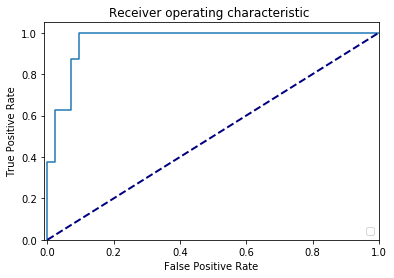

In [24]:
import numpy as np
from sklearn import metrics
y = test
scores = np.array([x for x,y in asd_predictions])
test.ravel()
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
print(fpr,tpr)
plt.plot(tpr,fpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()




# Testing the benchmark model

In [265]:
benchmark_model.load_weights('saved_models/weights.best.from_scratch_dual_input_benchmark_model_reference.hdf5')
#model.load_weights('saved_models/weights.best.from_scratch_dual_input_benchmark_model.hdf5')

In [266]:
test_tensors = [x_testX, x_testY]
test_targets = y_test
asd_predictions = benchmark_model.predict(test_tensors)
pred = np.argmax(asd_predictions, axis = 1)
print(pred)
print(np.argmax(np.array(test_targets)))

# report test accuracy

test_accuracy = 100*np.sum(np.array(pred)==np.argmax(test_targets, axis=1))/len(asd_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

[1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1]
0
Test accuracy: 88.0000%


# Metrics of the benchmark

In [267]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, confusion_matrix,classification_report
#test = np.array([x for x,y in test_targets])
test = np.argmax(test_targets, axis = 1)
#print((test_targets))
print("test labels: ",test)
print("pred labels: ",pred )
print("Accuracy", accuracy_score(test,pred))
print("Precision", precision_score(test,pred))
print("Recall", recall_score(test,pred))
print("F1 score", f1_score(test,pred))
print("Confusion Matrix \n", confusion_matrix(test,pred))
print("classification report\n ",classification_report(test,pred))


test labels:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
pred labels:  [1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1]
Accuracy 0.88
Precision 0.9285714285714286
Recall 0.9285714285714286
F1 score 0.9285714285714286
Confusion Matrix 
 [[ 5  3]
 [ 3 39]]
classification report
                precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.93      0.93      0.93        42

   micro avg       0.88      0.88      0.88        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.88      0.88      0.88        50



# ROC curve of benchmark

No handles with labels found to put in legend.


[0.         0.03225806 1.         1.        ] [0. 0. 0. 1.]


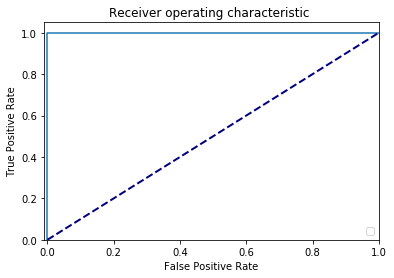

In [181]:
import numpy as np
from sklearn import metrics
y = test
scores = np.array([x for x,y in asd_predictions])
test.ravel()
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
print(fpr,tpr)
plt.plot(tpr,fpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()


